<Axes: xlabel='Month'>

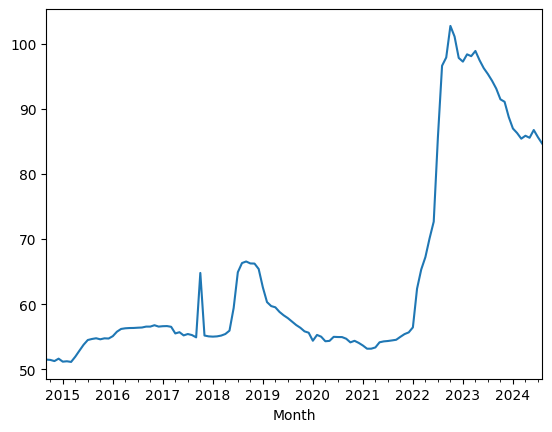

In [16]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))
data.head(10)

data = data.resample('MS').sum()
data['Price'].plot()

# ADF Test

In [17]:
p = adfuller(data['Price'])[1]
print   (f'P-value: {p} < 0.05 ({p < 0.05})')

P-value: 0.663961545174224 < 0.05 (False)


Differencing


In [18]:
data['Price_diff'] = data['Price'].diff()
data = data.dropna(subset=['Price_diff'])

p = adfuller(data['Price_diff'])[1]
print(f'P-value: {p} < 0.05 ({p < 0.05})')

P-value: 5.67356265349366e-06 < 0.05 (True)


## Train-test split


In [19]:
n = int(len(data) * 0.8)
train = data.iloc[0:n]
test = data.iloc[n:len(data)]

print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')

Train size: 95
Test size: 24


### Plotting ACF and PACF

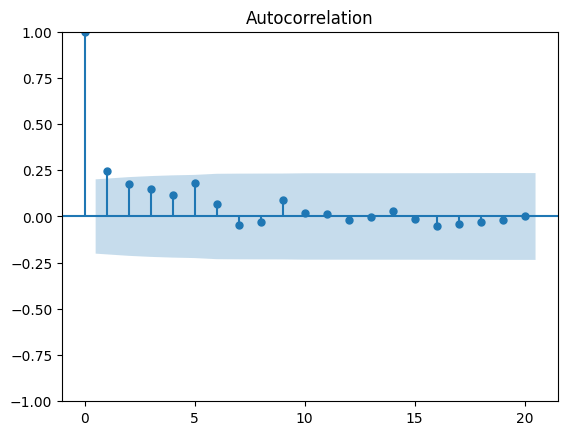

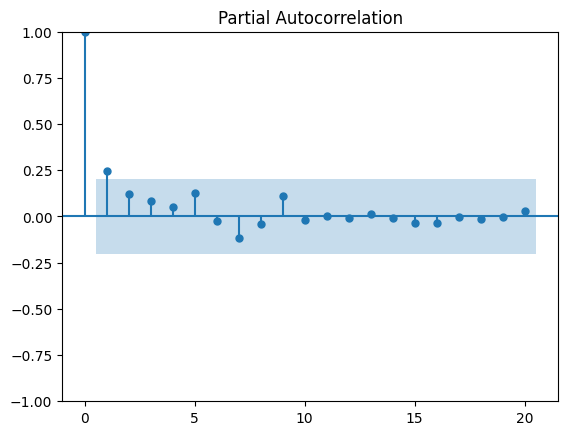

In [20]:
acf = plot_acf(train['Price_diff'])
pacf = plot_pacf(train['Price_diff'])

In [21]:
data['Price_diff'].shape

(119,)

### Finding the best Order

In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

def determine_best_arima_order(data, max_p=3, max_d=2, max_q=3):
    best_aic = float("inf")
    best_order = None
    best_model = None
    
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(data, order=(p, d, q)).fit()
                    if model.aic < best_aic:
                        best_aic = model.aic
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue
    
    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_order, best_model

# Example usage:
best_order, best_model = determine_best_arima_order(train['Price'])

Best ARIMA order: (0, 2, 1) with AIC: 424.0226596557086


ARIMA (0,1,0)

<Axes: xlabel='Month'>

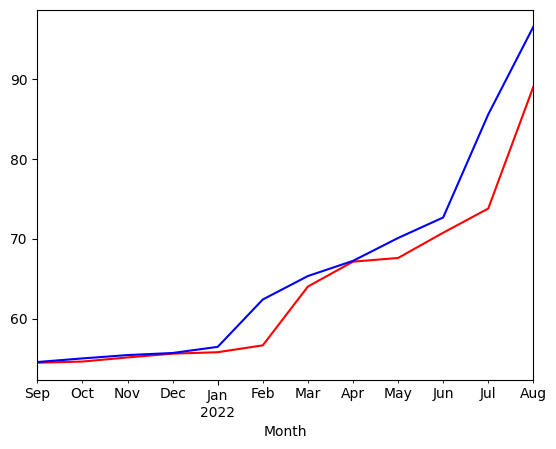

In [23]:
model = ARIMA(train['Price'], order=(0, 1, 2)).fit()

model.fittedvalues.iloc[-12:].plot(label='Fitted', color='red')
train['Price'].iloc[-12:].plot(label='Train', color='blue')

Forecasting

<Axes: xlabel='Month'>

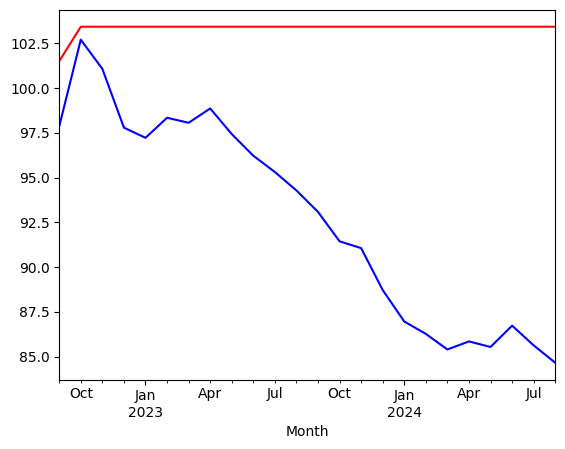

In [24]:
forecast = model.forecast(len(test)).rename('Forecast')
test['Price'].plot(label='Test', color='blue')
forecast.plot(label='Forecast', color='red')

<Axes: xlabel='Month'>

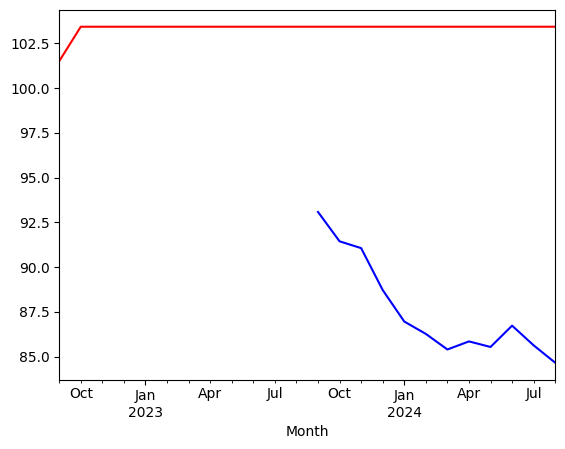

In [25]:
forecast = model.forecast(len(test)).rename('Forecast')
data['Price'].iloc[-12:].plot(label='Price', color='blue')
forecast.plot(label='Forecast', color='red')


In [26]:
forecast.head(48)

2022-09-01    101.501583
2022-10-01    103.424808
2022-11-01    103.424808
2022-12-01    103.424808
2023-01-01    103.424808
2023-02-01    103.424808
2023-03-01    103.424808
2023-04-01    103.424808
2023-05-01    103.424808
2023-06-01    103.424808
2023-07-01    103.424808
2023-08-01    103.424808
2023-09-01    103.424808
2023-10-01    103.424808
2023-11-01    103.424808
2023-12-01    103.424808
2024-01-01    103.424808
2024-02-01    103.424808
2024-03-01    103.424808
2024-04-01    103.424808
2024-05-01    103.424808
2024-06-01    103.424808
2024-07-01    103.424808
2024-08-01    103.424808
Freq: MS, Name: Forecast, dtype: float64